In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls '/content/drive'


MyDrive  Shareddrives


In [9]:
#Give dataset path
train_path = '/content/drive/MyDrive/Data/train'
test_path = '/content/drive/MyDrive/Data/test'

In [10]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [12]:
for layer in vgg.layers:
  layer.trainable = False

In [13]:
folders = glob('/content/drive/MyDrive/Data/train/*')
print(len(folders))

4


In [14]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3204 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 796 images belonging to 4 classes.


In [20]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-20-a5283437b26d>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 11.24598, saving model to mymodel.h5
5/5 - 309s - loss: 11.0362 - accuracy: 0.5000 - val_loss: 11.2460 - val_accuracy: 0.5930 - 309s/epoch - 62s/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10


5/5 - 32s - loss: 8.2309 - accuracy: 0.6375 - 32s/epoch - 6s/step
Epoch 3/10


5/5 - 27s - loss: 3.3644 - accuracy: 0.8188 - 27s/epoch - 5s/step
Epoch 4/10


5/5 - 31s - loss: 3.6798 - accuracy: 0.8250 - 31s/epoch - 6s/step
Epoch 5/10


5/5 - 26s - loss: 3.1882 - accuracy: 0.8438 - 26s/epoch - 5s/step
Epoch 6/10


5/5 - 24s - loss: 1.4786 - accuracy: 0.9000 - 24s/epoch - 5s/step
Epoch 7/10


5/5 - 25s - loss: 3.0311 - accuracy: 0.8687 - 25s/epoch - 5s/step
Epoch 8/10


5/5 - 19s - loss: 2.8162 - accuracy: 0.9125 - 19s/epoch - 4s/step
Epoch 9/10


5/5 - 19s - loss: 1.5260 - accuracy: 0.9250 - 19s/epoch - 4s/step
Epoch 10/10


5/5 - 19s - loss: 2.5212 - accuracy: 0.9062 - 19s/epoch - 4s/step
Training completed in time:  0:10:29.728691


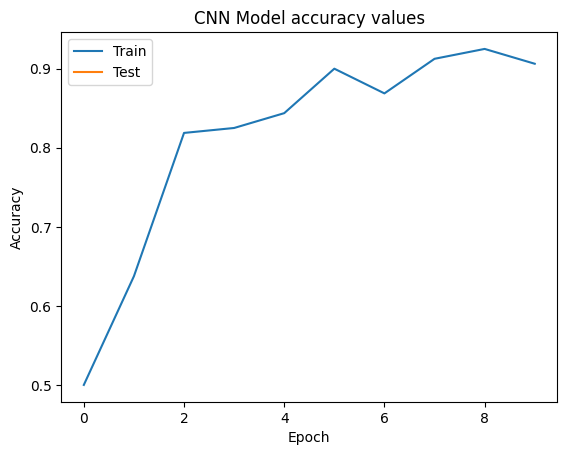

In [21]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [23]:
import cv2
image=cv2.imread(str('/content/zebra.jpg'))
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [24]:
pred=model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0. 0. 0. 1.]]


In [25]:
class_names = ['Buffalo','Elephant','Rhino','Zebra']
print(class_names)

['Buffalo', 'Elephant', 'Rhino', 'Zebra']


In [26]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Zebra


ResNet_50

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [28]:
from keras.applications import ResNet50

# Load ResNet50 model with pre-trained ImageNet weights
resnet = ResNet50(weights='imagenet', include_top=False)

In [29]:
#x = Flatten()(resnet.output)
#prediction = Dense(len(folders), activation='softmax')(x)
#model = Model(inputs=resnet.input, outputs=prediction)
#model.summary()
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# Load ResNet50 model without the top layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ensure that the output tensor of the ResNet model is properly accessed
# You can access the output of the last layer of ResNet50 using resnet.layers[-1].output
x = Flatten()(resnet.layers[-1].output)
prediction = Dense(len(folders), activation='softmax')(x)  # Assuming folders contains the number of classes
model = Model(inputs=resnet.input, outputs=prediction)

# Print model summary to check architecture
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [30]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [32]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [33]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3204 images belonging to 4 classes.


In [34]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 796 images belonging to 4 classes.


In [35]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel_r.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-35-d3f98769177a>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10



Epoch 1: val_loss improved from inf to 2533.76221, saving model to mymodel_r.h5
5/5 - 80s - loss: 6.3056 - accuracy: 0.4062 - val_loss: 2533.7622 - val_accuracy: 0.2902 - 80s/epoch - 16s/step
Epoch 2/10


5/5 - 12s - loss: 3.2526 - accuracy: 0.5000 - 12s/epoch - 2s/step
Epoch 3/10


5/5 - 13s - loss: 1.9864 - accuracy: 0.5375 - 13s/epoch - 3s/step
Epoch 4/10


5/5 - 14s - loss: 5.7474 - accuracy: 0.4500 - 14s/epoch - 3s/step
Epoch 5/10


5/5 - 11s - loss: 5.8107 - accuracy: 0.4563 - 11s/epoch - 2s/step
Epoch 6/10


5/5 - 12s - loss: 1.8100 - accuracy: 0.4938 - 12s/epoch - 2s/step
Epoch 7/10


5/5 - 11s - loss: 2.3894 - accuracy: 0.5875 - 11s/epoch - 2s/step
Epoch 8/10


5/5 - 9s - loss: 4.6212 - accuracy: 0.5000 - 9s/epoch - 2s/step
Epoch 9/10


5/5 - 10s - loss: 1.5694 - accuracy: 0.4875 - 10s/epoch - 2s/step
Epoch 10/10


5/5 - 10s - loss: 2.8637 - accuracy: 0.5125 - 10s/epoch - 2s/step
Training completed in time:  0:04:11.944994


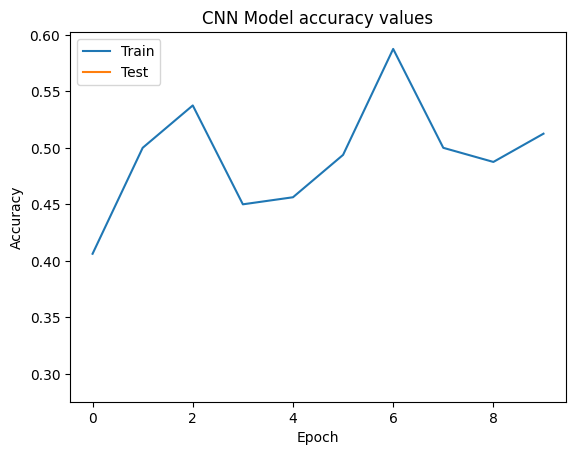

In [41]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [42]:
import cv2
image=cv2.imread(str('/content/zebra.jpg'))
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [43]:
class_names = ['Buffalo','Elephant','Rhino','Zebra']
print(class_names)

['Buffalo', 'Elephant', 'Rhino', 'Zebra']


In [44]:
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 1.]]


In [45]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Zebra


Mobile Net

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential



In [47]:

# Path to your dataset
train_path = '/content/drive/MyDrive/Data/train'
test_path = '/content/drive/MyDrive/Data/test'

# Load MobileNet model (without top layers)
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze MobileNet layers
for layer in mobilenet_model.layers:
    layer.trainable = False

# Preprocess input images using MobileNet's preprocess_input function
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Define batch size
batch_size = 32

# Load training data
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')  # Assuming categorical classification

# Load validation data
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')  # Assuming categorical classification

# Define your classification model
model = Sequential([
    mobilenet_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)



17225924/17225924 [==============================] - 0s 0us/step
Found 3204 images belonging to 4 classes.
Found 796 images belonging to 4 classes.
Epoch 1/10
101/101 [==============================] - 144s 1s/step - loss: 1.8844 - accuracy: 0.9220 - val_loss: 0.5364 - val_accuracy: 0.9611
Epoch 2/10
101/101 [==============================] - 23s 224ms/step - loss: 0.1426 - accuracy: 0.9872 - val_loss: 0.2550 - val_accuracy: 0.9736
Epoch 3/10
101/101 [==============================] - 22s 221ms/step - loss: 0.0770 - accuracy: 0.9913 - val_loss: 0.1972 - val_accuracy: 0.9862
Epoch 4/10
101/101 [==============================] - 22s 220ms/step - loss: 0.0274 - accuracy: 0.9953 - val_loss: 0.1779 - val_accuracy: 0.9887
Epoch 5/10
101/101 [==============================] - 23s 227ms/step - loss: 0.0300 - accuracy: 0.9963 - val_loss: 0.1236 - val_accuracy: 0.9912
Epoch 6/10
101/101 [==============================] - 23s 227ms/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 0.2383 - val_a

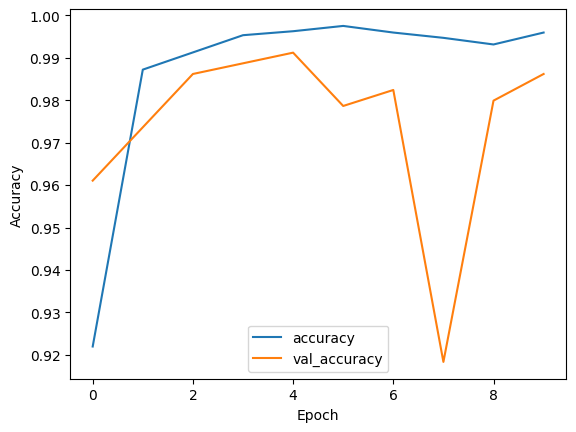

In [48]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
import cv2
image=cv2.imread(str('/content/rhino.jpg'))
image_resized= cv2.resize(image, (224,224))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [50]:
class_names = ['Buffalo','Elephant','Rhino','Zebra']
print(class_names)

['Buffalo', 'Elephant', 'Rhino', 'Zebra']


In [51]:
pred=model.predict(image)
print(pred)

1/1 [==============================] - 1s 864ms/step
[[1.6193326e-08 1.4648273e-02 9.8535174e-01 4.6851937e-08]]


In [52]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Rhino


The Vgg16 model is having 90% accuracy and the ResNet50 is showing little low accuracy of 50%. The best model is Mobile net of 98.60% accuracu for the classification